## Cross Validation Scoring
This notebook is a copy of the kaggle training lesson on cross validation.

The main point of this notebook is to introduce the benefits of cross validating, 
and using the scores obtained to plot what number of trees in a random forest model works best.



## Data preperation
Here we prepare our data by dropping rows with NaN target and dropping the target column from our training set


In [11]:
# Here, we will use pipelines and cross validations to show one way to test different models and determine which is "best"
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import the data from CSV
training_file_path = "./datasets/housing-data/train.csv"
test_file_path = "./datasets/housing-data/test.csv"

training_housing_data = pd.read_csv(training_file_path, index_col='Id')
test_housing_data = pd.read_csv(test_file_path, index_col='Id')

# From here, we will HotEncoding for categorical data and pipelines to help us stay organized
# Get our data and drop rows with NaN target
training_housing_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = training_housing_data.SalePrice
training_housing_data.drop(['SalePrice'], axis=1, inplace=True)

# For this test, lets select numeric columns only
numeric_cols = [colname for colname in training_housing_data.columns if training_housing_data[colname].dtype in ['int64', 'float64']]
X = training_housing_data[numeric_cols].copy()
X_test = test_housing_data[numeric_cols].copy()

## Scoring method
This is the method we will be using to test different number of trees of our random forest model.


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
def get_pipeline_score(n_estimators, X, y):
    """Return the avg MAE over 5 CV folds of a random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    X -- given training predictors
    y -- given training target
    """
    
    my_pipeline = Pipeline(steps=[
        # Assuming our data is numerical only
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    
    scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
    return scores.mean()

## Scoring
Here we the above scoring method to test different number of trees



In [15]:
# Using get_pipeline_score from model_scoring, test different values for the number of trees (n_estimators) of a random forest model.
results = {}
for i in range(50, 401, 50):
    results[i] = get_pipeline_score(i, X, y)

## Plotting results
Plot the results of our cross validation test

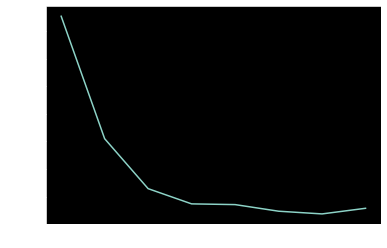

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()